In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

In [2]:
pd.set_option("display.precision", 2)

In [3]:
temp = pd.read_csv("./daily-temperature-of-major-cities/city_temperature.csv")

C:\Users\nenad\AppData\Local\Temp\ipykernel_7144\1546901350.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv("./daily-temperature-of-major-cities/city_temperature.csv")


In [4]:
temp.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [5]:
temp.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8
2906326,North America,US,Additional Territories,San Juan Puerto Rico,7,31,2013,83.6


In [6]:
print(temp.shape) # num of rows, cols

(2906327, 8)


In [7]:
print(temp.columns)

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')


In [8]:
print(temp.info()) # general information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB
None


In [9]:
temp.describe()

,Month,Day,Year,AvgTemperature
count,2.91e+06,2.91e+06,2.91e+06,2.91e+06
mean,6.47e+00,1.57e+01,2.01e+03,5.60e+01
std,3.46e+00,8.80e+00,2.34e+01,3.21e+01
min,1.00e+00,0.00e+00,2.00e+02,-9.90e+01
25%,3.00e+00,8.00e+00,2.00e+03,4.58e+01
50%,6.00e+00,1.60e+01,2.01e+03,6.25e+01
75%,9.00e+00,2.30e+01,2.01e+03,7.55e+01
max,1.20e+01,3.10e+01,2.02e+03,1.10e+02


In [10]:
temp.describe(include=['object']) # describe non-numerical features by explicitly indicating data types of interest

,Region,Country,State,City
count,2906327,2906327,1455337,2906327
unique,7,125,52,321
top,North America,US,Texas,Springfield
freq,1556681,1455337,129711,18530


In [11]:
temp["Region"].value_counts() # count categorical column values

Region
North America                        1556681
Europe                                381990
Asia                                  316663
Africa                                251118
South/Central America & Carribean     219530
Middle East                           124749
Australia/South Pacific                55596
Name: count, dtype: int64

In [12]:
temp["Region"].value_counts(normalize=True) # calculate fractions of categorical column values

Region
North America                        0.54
Europe                               0.13
Asia                                 0.11
Africa                               0.09
South/Central America & Carribean    0.08
Middle East                          0.04
Australia/South Pacific              0.02
Name: proportion, dtype: float64

In [13]:
# Sorting dataframes

In [14]:
temp.sort_values(by="AvgTemperature", ascending=True).head() # asc=true -> lowest ; asc=false -> highest

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1377340,South/Central America & Carribean,Guyana,NaN,Georgetown,8,21,2005,-99.0
88779,Africa,Guinea-Bissau,NaN,Bissau,3,27,1999,-99.0
88778,Africa,Guinea-Bissau,NaN,Bissau,3,26,1999,-99.0
88777,Africa,Guinea-Bissau,NaN,Bissau,3,25,1999,-99.0
88776,Africa,Guinea-Bissau,NaN,Bissau,3,24,1999,-99.0


In [15]:
temp.sort_values(by=["AvgTemperature","Month"], ascending=[True,False]).head() # sorting by multiple values

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1453,Africa,Algeria,NaN,Algiers,12,24,1998,-99.0
1454,Africa,Algeria,NaN,Algiers,12,25,1998,-99.0
1459,Africa,Algeria,NaN,Algiers,12,30,1998,-99.0
1460,Africa,Algeria,NaN,Algiers,12,31,1998,-99.0
7669,Africa,Algeria,NaN,Algiers,12,30,2015,-99.0


In [16]:
temp["AvgTemperature"].mean()

56.00492078145366

In [17]:
temp.AvgTemperature.mean()

56.00492078145366

In [18]:
temp.AvgTemperature

0          64.2
1          49.4
2          48.8
3          46.4
4          47.9
           ... 
2906322    82.4
2906323    81.6
2906324    84.2
2906325    83.8
2906326    83.6
Name: AvgTemperature, Length: 2906327, dtype: float64

In [19]:
temp.AvgTemperature[temp["Region"] == "Europe"].mean() # Average temperature by region

46.6962852430692

In [20]:
temp[temp["Country"] == "Canada"]["AvgTemperature"].mean()  # Average temperature by Country

42.00524749141356

In [21]:
temp[(temp["Country"] == "Canada") & (temp["Month"] == 12)]["AvgTemperature"].max() # Maxiumum temperature recorded in Canada in December

54.7

In [22]:
temp[(temp["Country"] == "Canada") & (temp["Month"] == 1)].min() # Minimum temperature data record in Canada in January

Region            North America
Country                  Canada
State                      None
City                    Calgary
Month                         1
Day                           1
Year                       1995
AvgTemperature            -99.0
dtype: object

In [23]:
temp.loc[0:5, "Country":"AvgTemperature"] # gives data records for indxed x:y and column rage from "Col 1" : "Col 2"

,Country,State,City,Month,Day,Year,AvgTemperature
0,Algeria,NaN,Algiers,1,1,1995,64.2
1,Algeria,NaN,Algiers,1,2,1995,49.4
2,Algeria,NaN,Algiers,1,3,1995,48.8
3,Algeria,NaN,Algiers,1,4,1995,46.4
4,Algeria,NaN,Algiers,1,5,1995,47.9
5,Algeria,NaN,Algiers,1,6,1995,48.7


In [24]:
temp.loc[0:5, ["Country","City","AvgTemperature"]] # gives data records for indxed x : y and columns Country, City, AvgTemperature

,Country,City,AvgTemperature
0,Algeria,Algiers,64.2
1,Algeria,Algiers,49.4
2,Algeria,Algiers,48.8
3,Algeria,Algiers,46.4
4,Algeria,Algiers,47.9
5,Algeria,Algiers,48.7


In [25]:
temp[-1:] # last record in data set; to get first record -> temp[:1]

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2906326,North America,US,Additional Territories,San Juan Puerto Rico,7,31,2013,83.6


In [26]:
temp[temp["City"].apply(lambda city: city[:3] == "Cal")].head(10) # Lambda function to select cities starting with "Cal"

,Region,Country,State,City,Month,Day,Year,AvgTemperature
321789,Asia,India,NaN,Calcutta,1,1,1995,63.0
321790,Asia,India,NaN,Calcutta,1,2,1995,61.4
321791,Asia,India,NaN,Calcutta,1,3,1995,60.6
321792,Asia,India,NaN,Calcutta,1,4,1995,61.3
321793,Asia,India,NaN,Calcutta,1,5,1995,62.3
321794,Asia,India,NaN,Calcutta,1,6,1995,66.6
321795,Asia,India,NaN,Calcutta,1,7,1995,66.8
321796,Asia,India,NaN,Calcutta,1,8,1995,66.9
321797,Asia,India,NaN,Calcutta,1,9,1995,62.7
321798,Asia,India,NaN,Calcutta,1,10,1995,66.8


In [27]:
# change data set value
temp.loc[(temp["State"].isnull().values.any()) & (temp["City"] == "Calgary"),"State"] = "Alberta"
temp[temp["City"] == "Calgary"].head(10)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1130116,North America,Canada,Alberta,Calgary,1,1,1995,12.6
1130117,North America,Canada,Alberta,Calgary,1,2,1995,4.5
1130118,North America,Canada,Alberta,Calgary,1,3,1995,2.5
1130119,North America,Canada,Alberta,Calgary,1,4,1995,11.4
1130120,North America,Canada,Alberta,Calgary,1,5,1995,11.3
1130121,North America,Canada,Alberta,Calgary,1,6,1995,4.0
1130122,North America,Canada,Alberta,Calgary,1,7,1995,5.4
1130123,North America,Canada,Alberta,Calgary,1,8,1995,4.5
1130124,North America,Canada,Alberta,Calgary,1,9,1995,7.1
1130125,North America,Canada,Alberta,Calgary,1,10,1995,17.1


In [28]:
# change data set value with method
t = temp.loc[(temp["State"].isnull().values.any()) & (temp["City"] == "Edmonton"),"State"] = "Alberta"
temp = temp.replace({"State": t})
temp[temp["City"] == "Edmonton"].head(10)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1137216,North America,Canada,Alberta,Edmonton,1,1,1995,9.5
1137217,North America,Canada,Alberta,Edmonton,1,2,1995,7.5
1137218,North America,Canada,Alberta,Edmonton,1,3,1995,-2.8
1137219,North America,Canada,Alberta,Edmonton,1,4,1995,-0.9
1137220,North America,Canada,Alberta,Edmonton,1,5,1995,5.4
1137221,North America,Canada,Alberta,Edmonton,1,6,1995,4.9
1137222,North America,Canada,Alberta,Edmonton,1,7,1995,7.8
1137223,North America,Canada,Alberta,Edmonton,1,8,1995,-3.8
1137224,North America,Canada,Alberta,Edmonton,1,9,1995,5.7
1137225,North America,Canada,Alberta,Edmonton,1,10,1995,7.7


In [29]:
# group column by values
show_columns = ["AvgTemperature","Year"]
temp.groupby(["City"])[show_columns].describe()

AvgTemperature                                                \
                      count   mean    std   min   25%   50%    75%    max   
City                                                                        
Abidjan              9266.0  75.14  30.02 -99.0  77.9  80.5  82.60   88.6   
Abilene              9266.0  64.24  18.38 -99.0  52.4  66.5  78.40   94.2   
Abu Dhabi            9266.0  82.19  15.73 -99.0  72.4  84.4  92.70  107.3   
Addis Ababa          9295.0  25.46  68.38 -99.0  57.1  61.3  64.20   77.0   
Akron Canton         9265.0  50.39  19.45 -99.0  35.5  52.2  67.00   86.1   
...                     ...    ...    ...   ...   ...   ...    ...    ...   
Yerevan              3226.0  53.70  25.20 -99.0  38.7  55.8  72.47   91.8   
Youngstown           9265.0  49.57  19.09 -99.0  35.1  51.4  65.60   86.7   
Yuma                 4380.0  64.06  45.81 -99.0  60.8  72.9  89.10  107.5   
Zagreb               9265.0  46.93  36.35 -99.0  39.9  54.2  66.60   87.5   
Zurich               9266.0  49.07  16.39 -99.0  38.9  50.1  60.30   82.4   

                Year                                                           
               count     mean     std     min     25%     50%     75%     max  
City                                                                           
Abidjan       9266.0  2007.19    7.33  1995.0  2001.0  2007.0  2014.0  2020.0  
Abilene       9266.0  2007.19    7.33  1995.0  2001.0  2007.0  2014.0  2020.0  
Abu Dhabi     9266.0  2007.19    7.33  1995.0  2001.0  2007.0  2014.0  2020.0  
Addis Ababa   9295.0  2001.55  101.00   201.0  2001.0  2007.0  2014.0  2020.0  
Akron Canton  9265.0  2007.19    7.33  1995.0  2001.0  2007.0  2014.0  2020.0  
...              ...      ...     ...     ...     ...     ...     ...     ...  
Yerevan       3226.0  1998.92    2.55  1995.0  1997.0  1999.0  2001.0  2003.0  
Youngstown    9265.0  2007.19    7.33  1995.0  2001.0  2007.0  2014.0  2020.0  
Yuma          4380.0  2000.50    3.45  1995.0  1997.0  2000.0  2003.0  2006.0  
Zagreb        9265.0  2007.19    7.32  1995.0  2001.0  2007.0  2014.0  2020.0  
Zurich        9266.0  2007.19    7.33  1995.0  2001.0  2007.0  2014.0  2020.0  

[321 rows x 16 columns]

In [30]:
# group column by values, passing functions to agg()
show_columns = ["AvgTemperature"]
temp.groupby(["City"])[show_columns].agg([np.mean, np.std, np.min, np.max])

AvgTemperature                    
                       mean    std   min    max
City                                           
Abidjan               75.14  30.02 -99.0   88.6
Abilene               64.24  18.38 -99.0   94.2
Abu Dhabi             82.19  15.73 -99.0  107.3
Addis Ababa           25.46  68.38 -99.0   77.0
Akron Canton          50.39  19.45 -99.0   86.1
...                     ...    ...   ...    ...
Yerevan               53.70  25.20 -99.0   91.8
Youngstown            49.57  19.09 -99.0   86.7
Yuma                  64.06  45.81 -99.0  107.5
Zagreb                46.93  36.35 -99.0   87.5
Zurich                49.07  16.39 -99.0   82.4

[321 rows x 4 columns]

In [31]:
# Summary tables
pd.crosstab(temp["Year"],temp["Country"])

Country,Albania,Algeria,Argentina,Australia,Austria,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Yugoslavia,Zambia
Year,,,,,,,,,,,,,,,,,,,,,
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,365,365,365,1825,365,365,365,365,365,365,...,365,365,730,730,365,365,365,365,365,365
1996,366,366,366,1830,366,366,366,366,366,366,...,366,366,732,732,366,366,366,366,366,366
1997,365,365,365,1825,365,365,365,365,365,365,...,365,365,730,730,365,365,365,365,365,365
1998,365,365,365,1825,365,365,365,365,365,365,...,365,365,730,730,365,365,365,365,365,365
1999,365,365,365,1825,365,365,365,365,365,365,...,365,365,730,730,365,365,365,365,365,365
2000,366,366,366,1830,366,366,366,366,366,366,...,366,366,732,732,366,366,366,366,366,366
2001,365,365,365,1825,365,365,365,365,365,365,...,365,365,730,730,365,365,365,365,365,365


In [32]:
temp.pivot_table(
            ["AvgTemperature"],
            ["Year","Month"],
    aggfunc="mean",
                 )

AvgTemperature
Year Month                
200  12             -99.00
201  11             -99.00
     12             -99.00
1995 1               36.45
     2               38.64
...                    ...
2020 1               47.48
     2               49.03
     3               55.37
     4               59.37
     5               62.79

[308 rows x 1 columns]

In [33]:
# Add new column, convert fahrenheit to celsius
fahrenheit_to_celsius = (((temp["AvgTemperature"] - 32) * 5 ) / 9)

temp.insert(loc=len(temp.columns), column="AvgTemperature(°C)", value=fahrenheit_to_celsius)
temp.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,AvgTemperature(°C)
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,17.89
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,9.67
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,9.33
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,8.00
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,8.83


In [34]:
# delete column, "column name", axis=0 or nothing for raw and 1 for column, inplace to tell whether to change the original DataFrame or not
# temp.drop(["AvgTemperature (C)", "Celsius avg temp"], axis=1, inplace=True)

# to drop rows -> temp.drop([1, 2].head())

In [35]:
temp.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,AvgTemperature(°C)
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,17.89
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,9.67
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,9.33
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,8.00
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,8.83


In [36]:
# total records per month / year and total
pd.crosstab(temp["Month"], temp["Year"], margins=True)

Year,200,201,1995,1996,1997,1998,1999,2000,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
Month,,,,,,,,,,,,,,,,,,,,,
1,0,0,10066,10076,10075,10106,10137,10137,10137,10137,...,9485,9455,9384,9145,9083,9083,9087,9052,8990,252698
2,0,0,9100,9425,9100,9128,9156,9483,9156,9156,...,8871,8540,8456,8260,8496,8204,8204,8176,8410,230401
3,0,0,10075,10075,10075,10106,10137,10137,10137,10137,...,9489,9455,9362,9145,9084,9083,9083,9052,8990,252689
4,0,0,9750,9750,9750,9780,9810,9810,9810,9810,...,9180,9150,9060,8821,8790,8790,8790,8760,8692,244491
5,0,0,10075,10075,10075,10106,10137,10137,10137,10137,...,9486,9455,9362,9114,9083,9083,9072,9050,3728,247332
6,0,0,9750,9750,9750,9780,9810,9810,9810,9810,...,9180,9150,8940,8820,8790,8790,8760,8730,0,235530
7,0,0,10075,10075,10075,10106,10137,10137,10137,10137,...,9486,9455,9176,9114,9083,9083,9052,9021,0,243287
8,0,0,10075,10075,10075,10106,10137,10137,10137,10137,...,9486,9393,9176,9114,9083,9083,9052,9021,0,243177
9,0,0,9750,9750,9750,9780,9810,9810,9810,9810,...,9180,9090,8880,8820,8790,8790,8760,8730,0,235274


In [37]:
# set up plotting
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

#graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

<Axes: xlabel='Region', ylabel='count'>

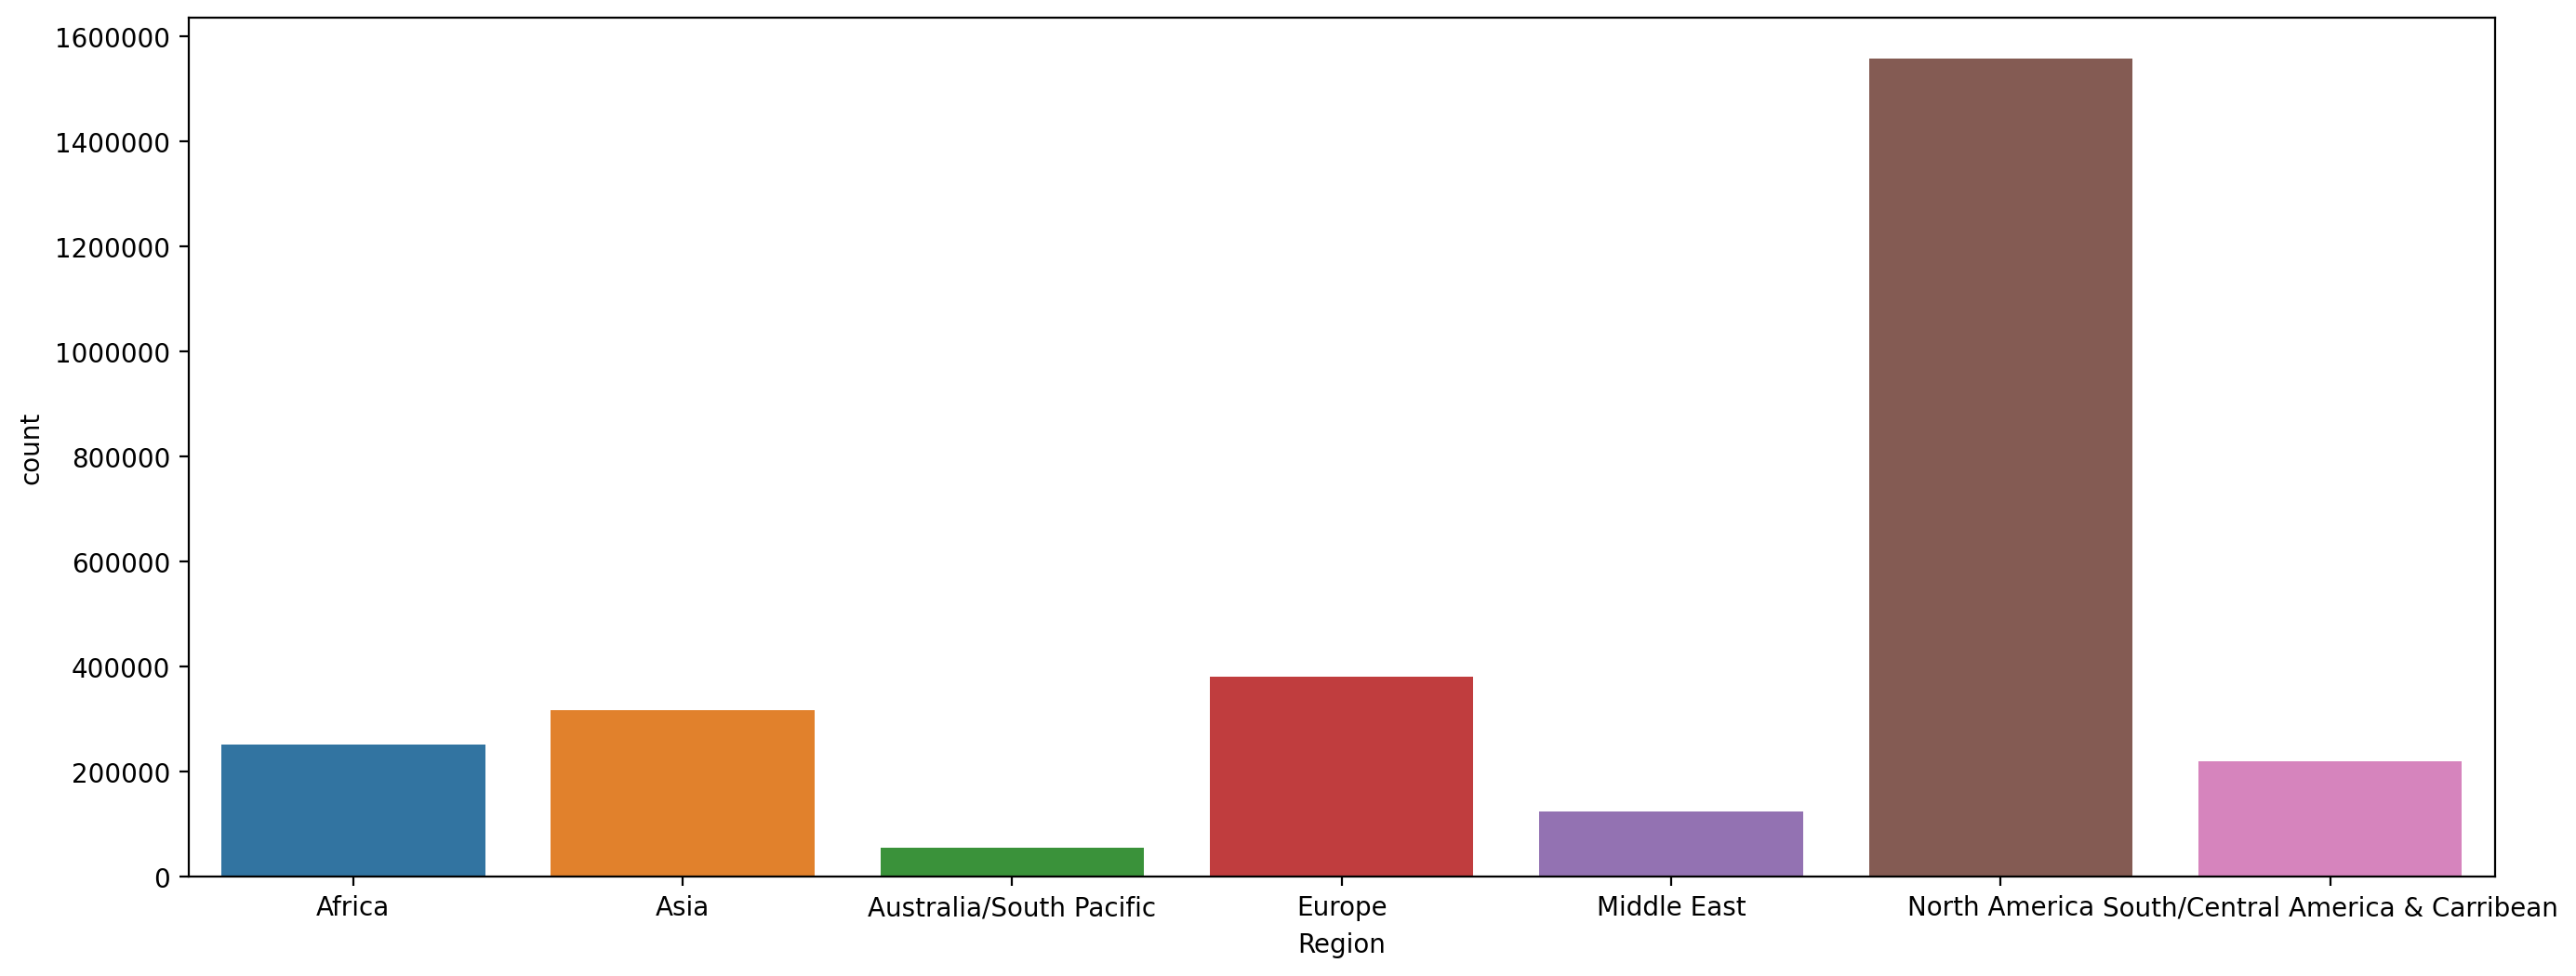

In [38]:
# set plot dimensions, text size and representation
fix, ax = plt.subplots(figsize=(16,6))
plt.xticks(size=10)
plt.yticks(size=10)
plt.ticklabel_format(style='plain', axis='y')

# draw the plot, count data records per region
sns.countplot(x="Region", ax=ax, data=temp)

<Axes: xlabel='AvgTemperature(°C)', ylabel='Count'>

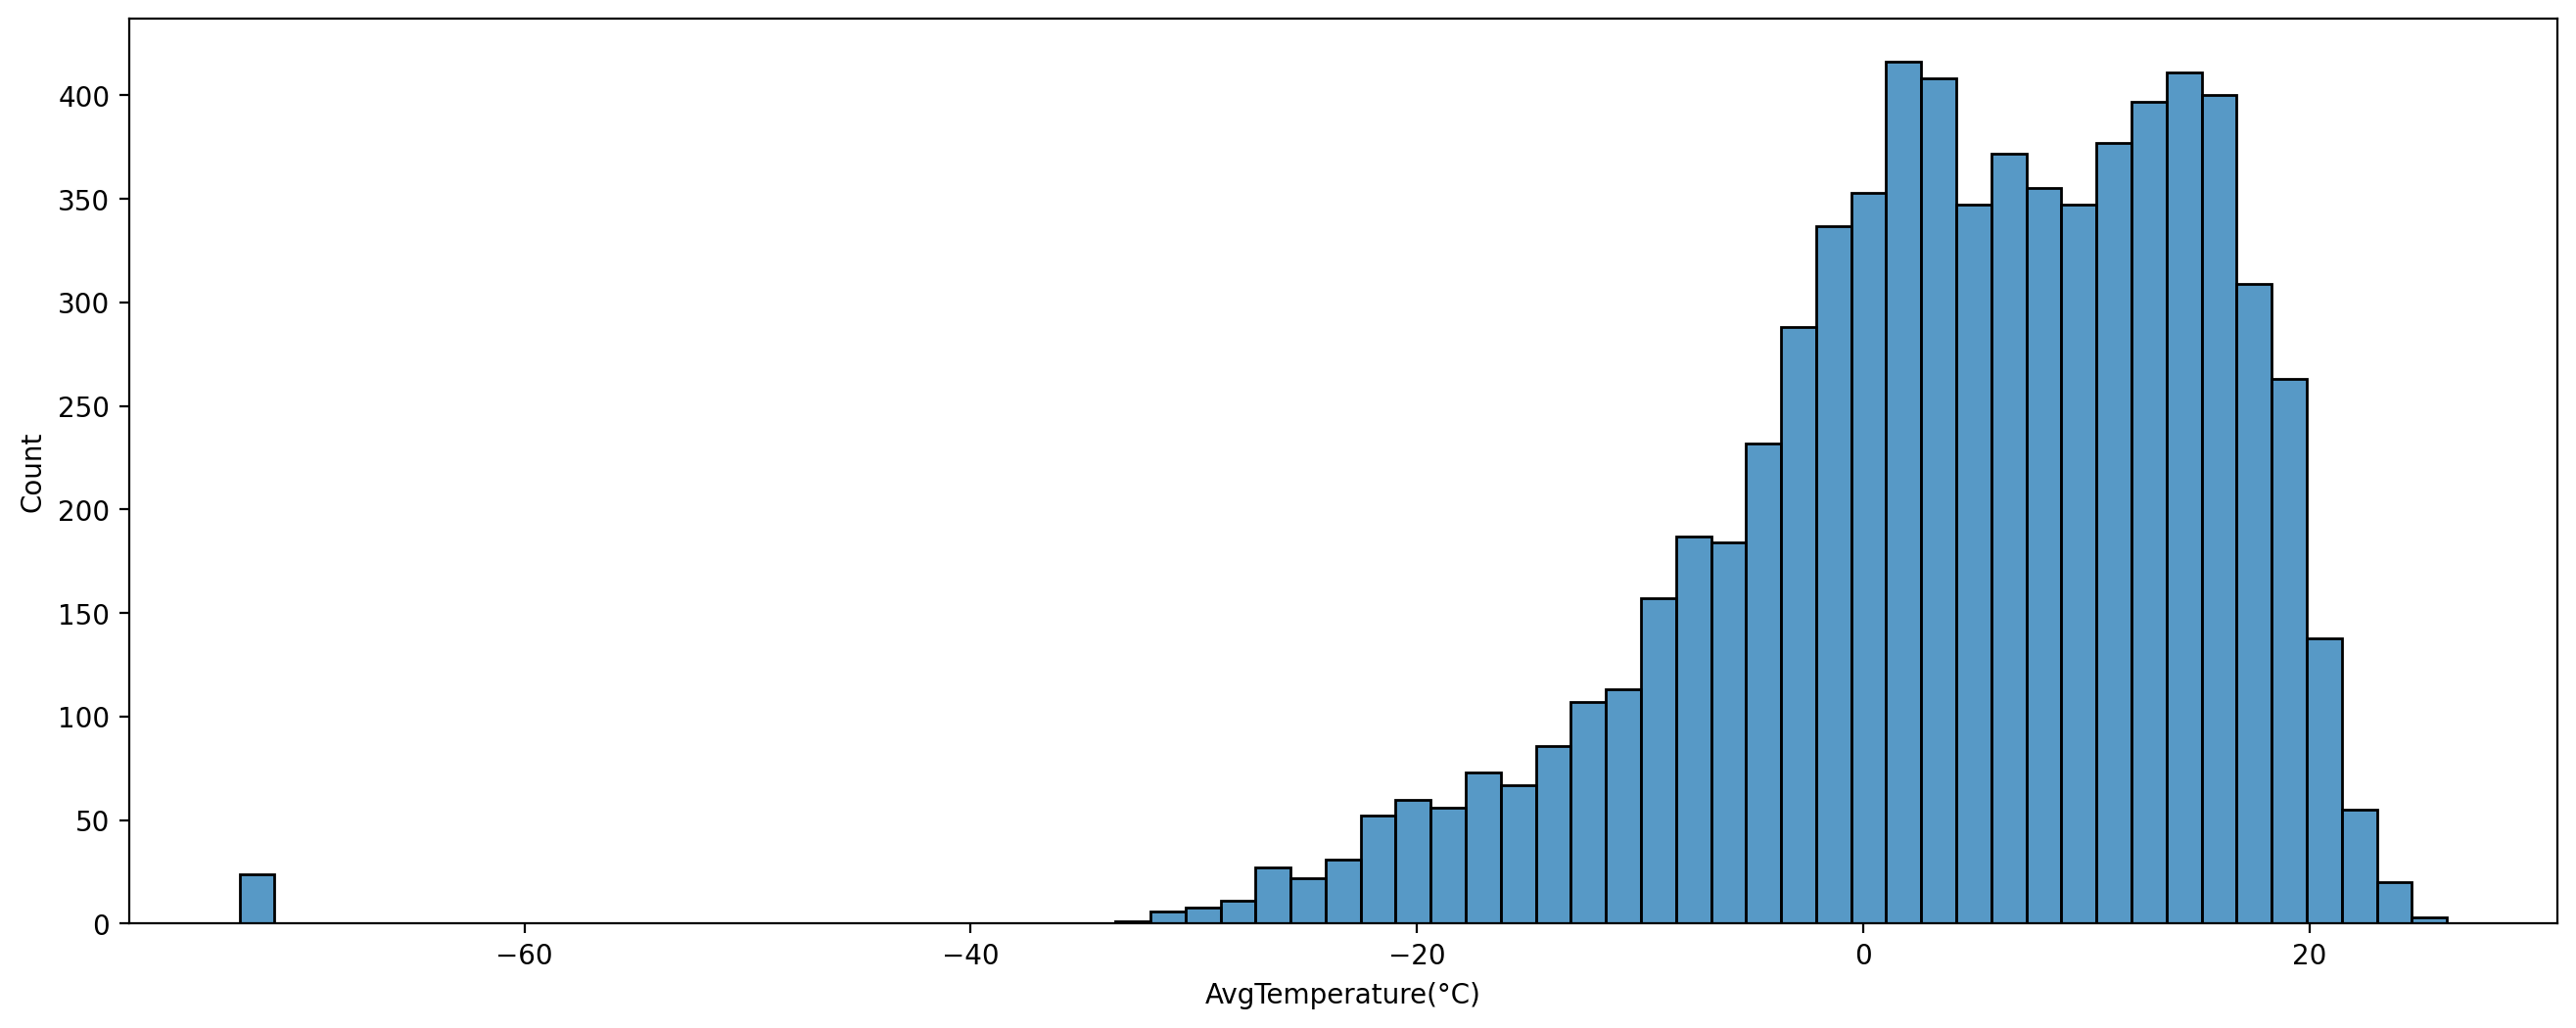

In [55]:
plotNew = temp.loc[(temp["City"] == "Calgary"), "AvgTemperature(°C)"]

fix, ax = plt.subplots(figsize=(16,6))
sns.histplot(plotNew,ax=ax)

#AvgTemperature(°C)